<a href="https://colab.research.google.com/github/jtneumann/MLwork/blob/master/fastai/ml1/titanticTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q fastai==0.7.0
!pip install -q pandas==0.23.4

    100% |████████████████████████████████| 122kB 3.8MB/s 
    100% |████████████████████████████████| 1.5MB 14.4MB/s 
    100% |████████████████████████████████| 496.4MB 38kB/s 
    100% |████████████████████████████████| 3.6MB 4.0MB/s 
    100% |████████████████████████████████| 61kB 20.5MB/s 
    100% |████████████████████████████████| 12.4MB 2.6MB/s 
    100% |████████████████████████████████| 81kB 25.0MB/s 
mizani 0.5.3 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
    100% |████████████████████████████████| 8.9MB 4.4MB/s 


    100% |████████████████████████████████| 8.9MB 1.6MB/s 


In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
!ls

sample_data  test.csv  train.csv


In [0]:
import pandas as pd
df_raw = pd.read_csv('train.csv', low_memory=False)

In [0]:
df_test = pd.read_csv('test.csv', low_memory=False)

In [9]:
df_raw.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
total = df_raw.isnull().sum().sort_values(ascending = False)
percent = round(df_raw.isnull().sum().sort_values(ascending = False)/len(df_raw)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [0]:
train_cats(df_raw)

In [0]:
train_cats(df_test)

In [14]:
df_raw.Sex.cat.categories


Index(['female', 'male'], dtype='object')

In [0]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Age            0.198653
Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Survived       0.000000
Ticket         0.000000
dtype: float64

In [0]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/titanic_raw')

In [0]:
import feather
df_raw = feather.read_dataframe('tmp/titanic_raw')

  ** proc_df** takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:

In [0]:
df, y, nas = proc_df(df_raw, 'Survived')

In [0]:
df_test, y, nas = proc_df(df_test)

This is a simple look at the whole data set.

In [21]:

m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8923727351164796

saving data to return to this stage if needed.

In [0]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/titantic-raw')

Creating a validation step

In [24]:

def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 862  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((29, 12), (29,), (862, 12))

In [0]:

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [26]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 13.2 ms, sys: 4.27 ms, total: 17.4 ms
Wall time: 109 ms
[0.20594609271226363, 0.4392965268643507, 0.8301428571428571, 0.18034982423047255]


In [0]:

df_trn, y_trn, nas = proc_df(df_raw, 'Survived', subset=800, na_dict=nas)
X_train, _ = split_vals(df_trn, 400)
y_train, _ = split_vals(y_trn, 400)

In [36]:
display(y_train)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 

In [37]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 24.2 ms, sys: 4.03 ms, total: 28.2 ms
Wall time: 109 ms
[0.17248188310660342, 0.2926397974371967, 0.8730666666666667, 0.636269456114779]


In [39]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.34328511071341905, 0.3662184282195494, 0.4971960864532293, 0.4303693022563655]


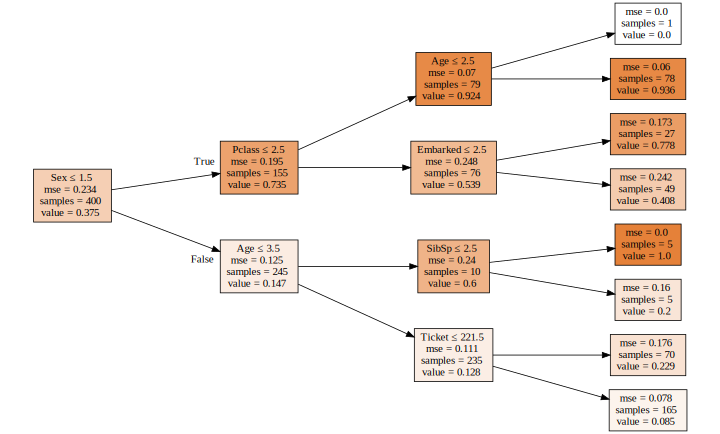

In [40]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [41]:

m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.36525425781752124, 1.0, 0.43336477178541843]


In [42]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.17014699527173555, 0.3066547292474675, 0.87648, 0.6005960730515305]


In [43]:

preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]), 0.2, 0)

In [44]:
preds.shape


(10, 862)

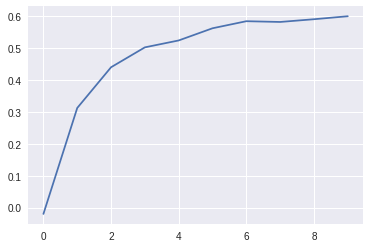

In [45]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [46]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.141178079034955, 0.3053895234301296, 0.91496, 0.6038850210066022]


In [47]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.14273007741888183, 0.2926571404496198, 0.9130799999999999, 0.6362263425648063]


In [48]:

m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.13889772541334144, 0.2927311463987489, 0.917685, 0.6360423400926006]


In [49]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14506464076404008, 0.2972503046583629, 0.9102133333333333, 0.6247181042613394, 0.37283143432320254]


In [0]:

df_trn, y_trn, nas = proc_df(df_raw, 'Survived')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [0]:
set_rf_samples(800)

In [52]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 14.6 ms, sys: 5.66 ms, total: 20.2 ms
Wall time: 110 ms
[0.0, 0.5394527604364069, 1.0, -0.2360038869358938, -1.0714285714285716]


In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.0, 0.5398826889847731, 1.0, -0.23797479207750968, -1.0714285714285716]


In [0]:
reset_rf_samples()

In [0]:

def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [55]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.18517233352595705, 0.4547610027317299, 0.8626815476190477, 0.12162608962816912, -0.11373579894622976]


In [0]:

t=m.estimators_[0].tree_

In [57]:
dectree_max_depth(t)

5

In [58]:

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2864813716783448, 0.4188889720656137, 0.671322877695087, 0.2547347853157682, 0.07193708696392109]


In [59]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.29271486170022953, 0.42374312392096625, 0.6568640294818324, 0.2373622040094002, 0.14042865825327722]


In [60]:
df_test = pd.read_csv('test.csv', low_memory=False)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
m_pred = m.predict(df_test)

ValueError: ignored